<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/Semana9/MediaMovil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/")
!ls

GitStuff    README.md  Semana2	Semana4  Semana6  Semana8
ProyectoML  Semana1    Semana3	Semana5  Semana7  Semana9


In [3]:
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana9/Data/MediaMovilData.csv'
file

'/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana9/Data/MediaMovilData.csv'

In [4]:
data = pd.read_csv(file)
data.head(10)

,Ventas
0,1250
1,1150
2,970
3,1100
4,1170
5,1080
6,1120
7,1230
8,1210
9,1050


In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array(data.Ventas)
x

array([1250, 1150,  970, 1100, 1170, 1080, 1120, 1230, 1210, 1050, 1030,
        990, 1160, 1200, 1180, 1260, 1230, 1190])

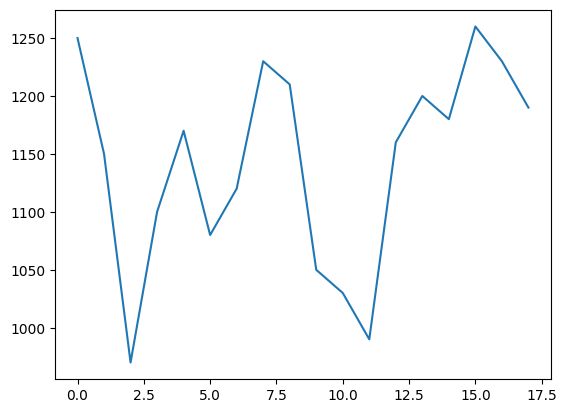

In [10]:
plt.plot(x)

In [11]:
def GetMediaMovil(x,n):

  media = np.zeros(len(x) + 1)

  for i in range( len(media)):

    sum_ = 0.

    if i >= n:

      for j in range(i-n,i):

        sum_ += x[j]

      media[i] = sum_/n

    else:
      media[i] = x[i]

  return media

In [16]:
media = GetMediaMovil(x,2)

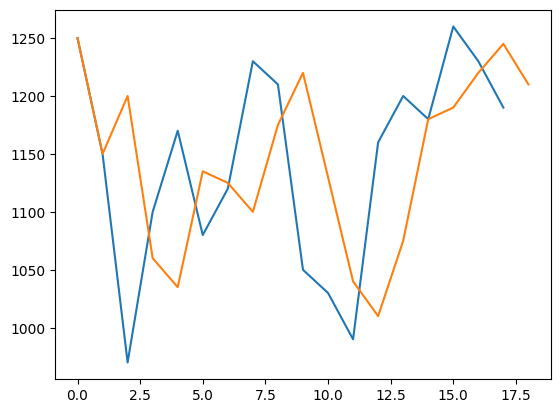

In [17]:
plt.plot(x)
plt.plot(media)

In [18]:
media[-1]

1210.0

In [19]:
def GetWeightedMediaMovil(x,w):

  n = len(w)

  media = np.zeros(len(x) + 1)

  for i in range( len(media)):

    sum_ = 0.

    if i >= n:

      k = 0
      for j in range(i-n,i):

        sum_ += w[k]*x[j]
        k += 1

      media[i] = sum_

    else:
      media[i] = x[i]

  return media

In [30]:
w = np.array([0.5,0.4,0.1])
Wmedia = GetWeightedMediaMovil(x,w)

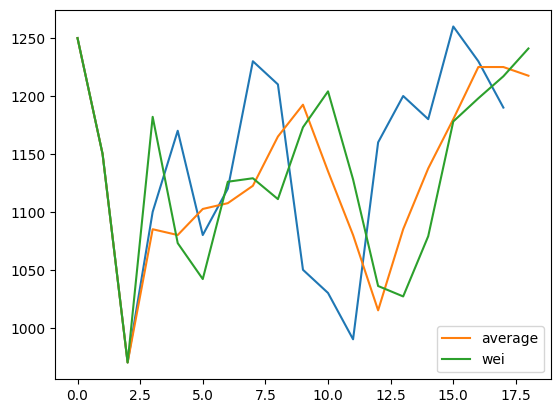

In [31]:
plt.plot(x)
plt.plot(media,label='average')
plt.plot(Wmedia,label='wei')
plt.legend()

In [32]:
def GetError(x,y):
  return np.mean( np.abs(x-y) )

In [33]:
GetError(x,Wmedia[:-1])

77.61111111111111

In [45]:
def Cost(w):

  Wmedia = GetWeightedMediaMovil(x,w)
  Error = GetError(x,Wmedia[:-1])
  return Error

In [79]:
w0 = np.array([0.1,0.1,0.1,0.1,0.5])
n = len(w0)

In [80]:
def restriccion(w):
  return np.sum(w) - 1

In [81]:
constraints = ( {'type':'eq', 'fun': restriccion} )
bounds = [(0,1) for _ in range(n)]
import scipy.optimize as spo

In [82]:
bounds

[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

In [83]:
result = spo.minimize(Cost,w0,options={'disp':True},constraints=constraints,bounds=bounds)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 44.29072177158342
            Iterations: 19
            Function evaluations: 148
            Gradient evaluations: 19


In [84]:
np.round(result.x,2)

array([0.11, 0.  , 0.02, 0.  , 0.87])

In [85]:
wopt = result.x

In [86]:
mean = GetWeightedMediaMovil(x,wopt)

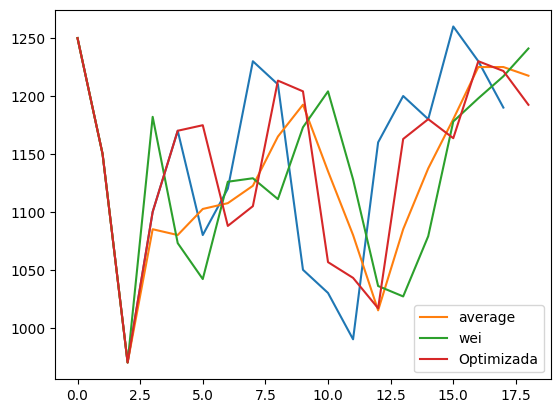

In [87]:
plt.plot(x)
plt.plot(media,label='average')
plt.plot(Wmedia,label='wei')
plt.plot(mean,label='Optimizada')
plt.legend()

In [78]:
mean[-1]

1190.0